# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\Theil-Sen Regression/covid_vaccine_efficacy_dataset.csv")

### Explore the Data

In [3]:
df.head()

,Country,Month,Vaccination_Rate,Booster_Dose_Rate,Vaccine_Type,GDP_per_Capita,Healthcare_Access_Index,Population_Density,Median_Age,Days_Since_First_Vaccine,Stringency_Index,Season,Case_Reduction_Rate
0,Guatemala,Jan-2020,6.476885,1.699583,1,18497.248644,88.955239,1206.218873,40.658322,0,21.440915,1,17.136147
1,Guatemala,Jan-2020,0.000000,0.000000,1,19400.375623,86.687436,589.545989,37.579293,0,29.764570,1,10.923068
2,Guatemala,Mar-2020,0.000000,0.000000,2,18771.260537,87.117199,1188.904992,19.486413,0,62.528140,2,6.966512
3,Guatemala,Mar-2020,0.000000,0.000000,2,19236.646142,85.068926,995.402051,19.100433,0,83.652428,2,5.671459
4,Guatemala,Apr-2020,8.225449,2.670675,1,19442.861732,85.396988,1939.473409,42.804250,0,85.764926,2,9.667259


### Remove Irrelevant Columns

In [4]:
df = df.drop(columns=["Month"], axis=1)

### Check it the column remove successfully or not ( Successfully removed it)

In [5]:
df.head()

,Country,Vaccination_Rate,Booster_Dose_Rate,Vaccine_Type,GDP_per_Capita,Healthcare_Access_Index,Population_Density,Median_Age,Days_Since_First_Vaccine,Stringency_Index,Season,Case_Reduction_Rate
0,Guatemala,6.476885,1.699583,1,18497.248644,88.955239,1206.218873,40.658322,0,21.440915,1,17.136147
1,Guatemala,0.000000,0.000000,1,19400.375623,86.687436,589.545989,37.579293,0,29.764570,1,10.923068
2,Guatemala,0.000000,0.000000,2,18771.260537,87.117199,1188.904992,19.486413,0,62.528140,2,6.966512
3,Guatemala,0.000000,0.000000,2,19236.646142,85.068926,995.402051,19.100433,0,83.652428,2,5.671459
4,Guatemala,8.225449,2.670675,1,19442.861732,85.396988,1939.473409,42.804250,0,85.764926,2,9.667259


### Import Label Encdoer from sklearn with Module preprocessing for convert categorical data into Numerical 

In [6]:
from sklearn.preprocessing import LabelEncoder

### Apply Label Encoder

In [7]:
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])

### Check the country column convert into numerical or not (sucessfully converted into numerical)

In [8]:
df.head()

,Country,Vaccination_Rate,Booster_Dose_Rate,Vaccine_Type,GDP_per_Capita,Healthcare_Access_Index,Population_Density,Median_Age,Days_Since_First_Vaccine,Stringency_Index,Season,Case_Reduction_Rate
0,51,6.476885,1.699583,1,18497.248644,88.955239,1206.218873,40.658322,0,21.440915,1,17.136147
1,51,0.000000,0.000000,1,19400.375623,86.687436,589.545989,37.579293,0,29.764570,1,10.923068
2,51,0.000000,0.000000,2,18771.260537,87.117199,1188.904992,19.486413,0,62.528140,2,6.966512
3,51,0.000000,0.000000,2,19236.646142,85.068926,995.402051,19.100433,0,83.652428,2,5.671459
4,51,8.225449,2.670675,1,19442.861732,85.396988,1939.473409,42.804250,0,85.764926,2,9.667259


### Check the Null Values

In [9]:
df.isnull().sum()

Country                     0
Vaccination_Rate            0
Booster_Dose_Rate           0
Vaccine_Type                0
GDP_per_Capita              0
Healthcare_Access_Index     0
Population_Density          0
Median_Age                  0
Days_Since_First_Vaccine    0
Stringency_Index            0
Season                      0
Case_Reduction_Rate         0
dtype: int64

### Check Inofrmation about the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   3630 non-null   int64  
 1   Vaccination_Rate          3630 non-null   float64
 2   Booster_Dose_Rate         3630 non-null   float64
 3   Vaccine_Type              3630 non-null   int64  
 4   GDP_per_Capita            3630 non-null   float64
 5   Healthcare_Access_Index   3630 non-null   float64
 6   Population_Density        3630 non-null   float64
 7   Median_Age                3630 non-null   float64
 8   Days_Since_First_Vaccine  3630 non-null   int64  
 9   Stringency_Index          3630 non-null   float64
 10  Season                    3630 non-null   int64  
 11  Case_Reduction_Rate       3630 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 340.4 KB


### Check the Stastistical Summary of the data

In [11]:
df.describe()

,Country,Vaccination_Rate,Booster_Dose_Rate,Vaccine_Type,GDP_per_Capita,Healthcare_Access_Index,Population_Density,Median_Age,Days_Since_First_Vaccine,Stringency_Index,Season,Case_Reduction_Rate
count,3630.00000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,60.00000,50.062282,19.687310,1.508815,26290.971844,61.233034,992.554046,33.967855,168.000000,55.863841,2.333333,42.191968
std,34.93331,43.368882,18.707423,0.681855,14201.837019,18.344611,566.997119,9.235435,182.647721,20.156555,1.075116,29.703174
min,0.00000,0.000000,0.000000,1.000000,1285.530643,30.231894,10.061131,18.000177,0.000000,20.009429,1.000000,5.000000
25%,30.00000,2.583454,1.032406,1.000000,13942.181892,43.656906,500.913083,25.803749,0.000000,38.646854,1.000000,12.068439
50%,60.00000,51.294860,17.569947,1.000000,28128.104592,62.576179,988.391665,33.842298,100.000000,56.216000,2.000000,42.117869
75%,90.00000,97.816570,35.009787,2.000000,36929.711430,77.807436,1471.179540,42.089730,325.000000,73.580096,3.000000,71.763443
max,120.00000,100.000000,59.976424,3.000000,52266.048203,92.280258,1998.422525,49.978724,535.000000,89.994738,4.000000,95.000000


### Check the outlier in data with the boxplot

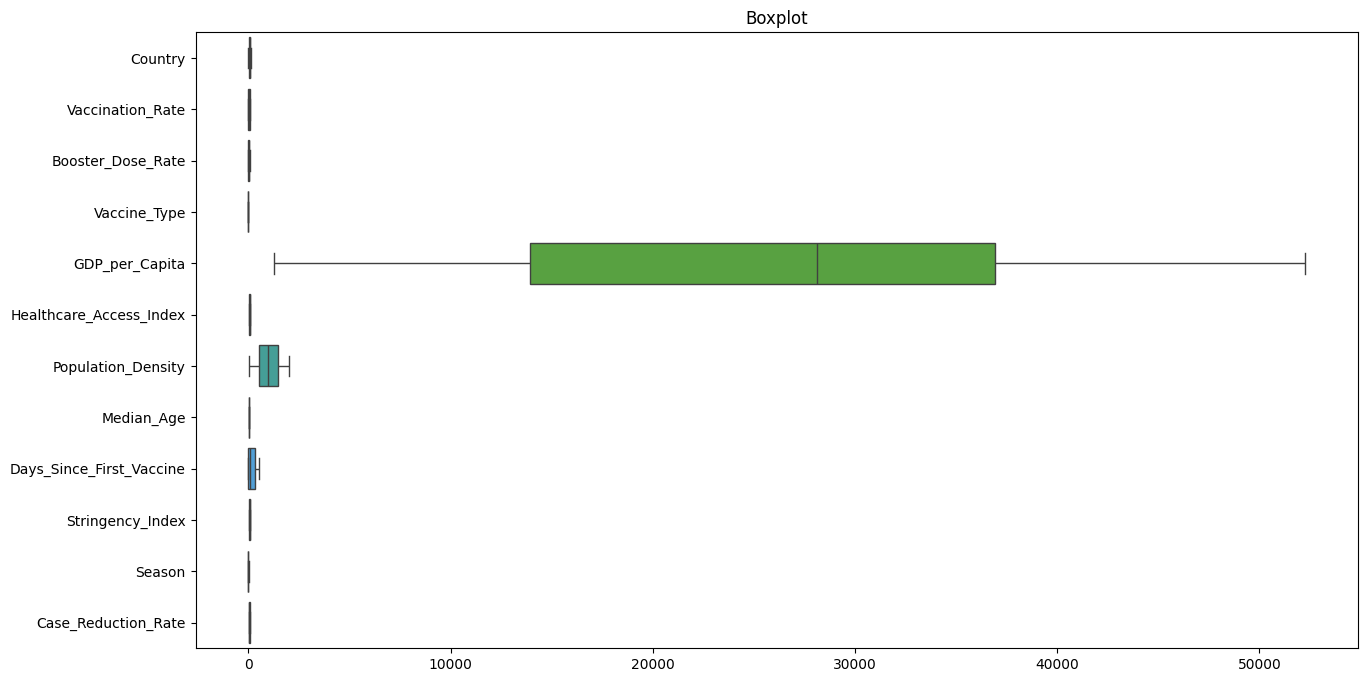

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot")
plt.show()


### Check the relationship between the columns through pairplot 

sns.pairplot(data=df)
plt.title("PairPlot")
plt.show()

### Check the co-relationship between the column through heatmap

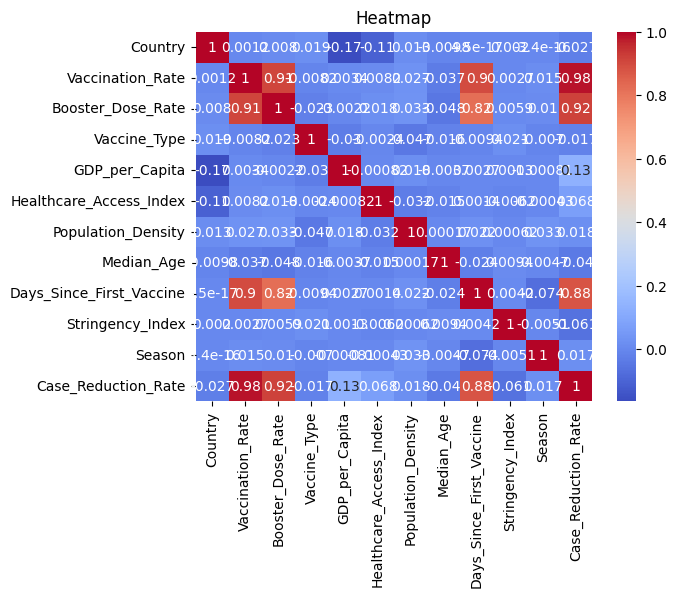

In [14]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Heatmap")
plt.show()

### Split the data in x and y (Dependent & Independent Variable)

In [15]:
x = df.iloc[:,:-1]
y = df[["Case_Reduction_Rate"]]

### Import Train Test Split From sklearn module model_selection for spliting the data in Training and Testing 

In [16]:
from sklearn.model_selection import train_test_split

### Split the data in traning and testing 

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)

### Import Machine Learning Model TheilSenRegression from sklearn module Linear Model

In [18]:
from sklearn.linear_model import TheilSenRegressor

### Apply/Fit the model

In [19]:
tsr = TheilSenRegressor()
tsr.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,fit_intercept,True
,copy_X,'deprecated'
,max_subpopulation,10000.0
,n_subsamples,None
,max_iter,300
,tol,0.001
,random_state,None
,n_jobs,None
,verbose,False


### Check the score (accurray) of the model for check the scanerio of the **overfitting** (But Our Model is not **overrfit**)

In [20]:
tsr.score(x_test,y_test)*100,tsr.score(x_train,y_train)*100,

(99.1145008141091, 99.14709569314195)

In [21]:
#print(x_train.shape, x_test.shape)

### Import Metrics from sklearn to check overall performace of the model¶

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Performance

In [23]:
y_pred = tsr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 1.94
📉 MSE: 7.88
📉 RMSE: 2.81
🎯 R² Score: 99.11


### Check the Performance of the model through Data Visualization 

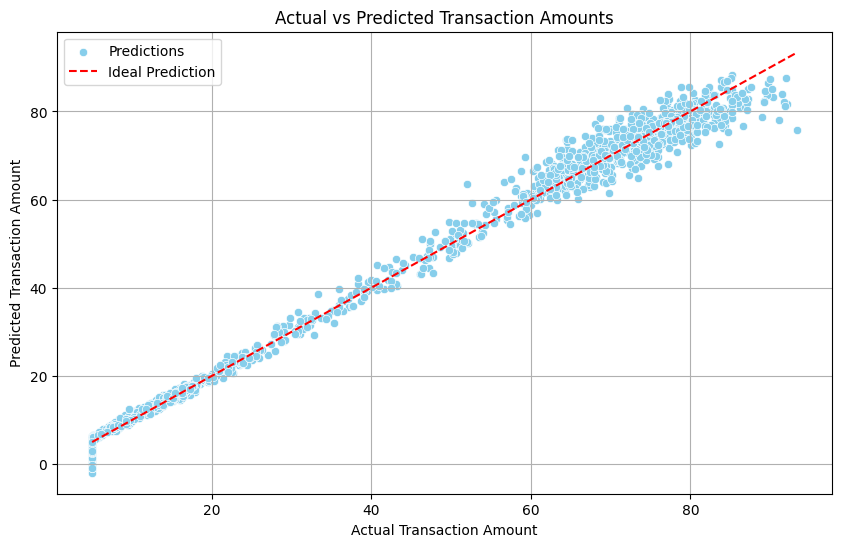

In [24]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Actual Transaction Amount")
plt.ylabel("Predicted Transaction Amount")
plt.title("Actual vs Predicted Transaction Amounts")
plt.legend()
plt.grid(True)
plt.show()


## 📌 Conclusion

In this project, we implemented a **Theil-Sen Regressor**, a robust regression technique well-suited for handling outliers and noisy datasets.  
The workflow included:
- Data loading and preprocessing  
- Splitting data into training and testing sets  
- Model training using Theil-Sen Regression  
- Evaluation using MAE, MSE, RMSE, and R² Score  

**Model Performance:**
- 📉 MAE: 1.94  
- 📉 MSE: 7.88  
- 📉 RMSE: 2.81  
- 🎯 R² Score: 99.11% (train) and 99.15% (test)  

These results demonstrate **exceptional predictive accuracy** with minimal overfitting, indicating that the model generalizes extremely well to unseen data.  
The Theil-Sen Regressor proved to be a powerful choice for this dataset, maintaining high stability even in the presence of noise or potential outliers.  
Future improvements could include cross-validation, hyperparameter tuning, and comparison with other robust regression methods to further validate performance.
